**3. Lasso and Ridge regression**

As the Huber model, Ridge and Lasso have a regularization parameter $\alpha$. We therefore standardize the features and use a validation set to fine-tune the hyperparameter as in the Huber regression case.

*Aggregation by suburbs*

Lasso

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.17 / MAE train 0.13 / Nobs: 14261
R2 test: 0.63 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.48 / RMSE train 62.20 / MAE train 37.77 / Nobs: 14261
R2 test: 0.49 / RMSE test 61.00 / MAE test 36.76 / Nobs: 4451



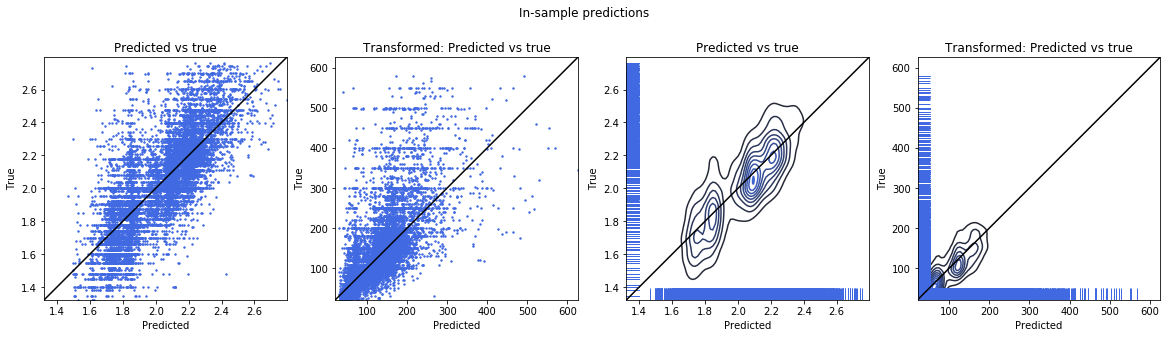

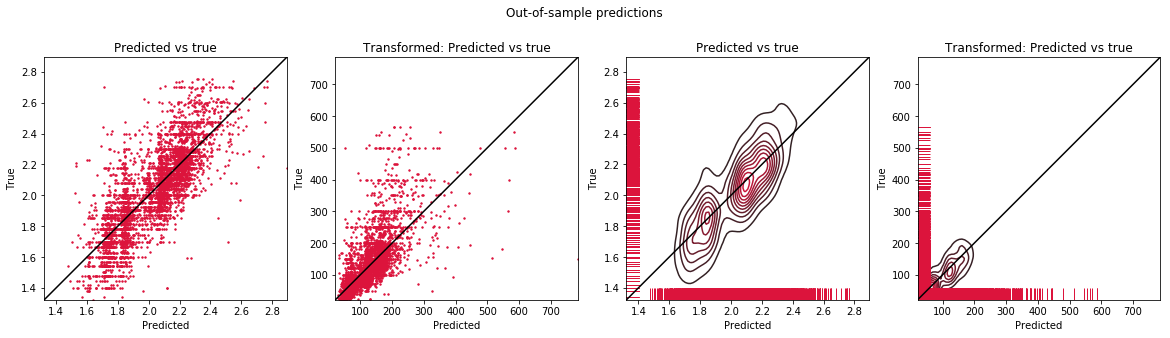

In [315]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
lasso_suburb = print_results('Lasso_suburbs.p', test_tpl, train_tpl, 'both', True)

In [316]:
best_params = lasso_suburb['fitted_model'].best_params_
best_params

{'lasso__alpha': 0.0001}

In [317]:
X_train, y_train = prepare_datasets(X_train_suburb, y_train_suburb)
regr = linear_model.Lasso(alpha=best_params['lasso__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('lasso', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_suburb.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_suburb_same_room_type,0.006579
Air_calculated_host_listings_count,-0.001897
Air_bathrooms,0.021886
Air_beds,-0.004917
Air_bedrooms,0.062399
Air_accommodates,0.037406
Air_extra_people,0.008077
Air_guests_included,0.007515
Air_distance_to_CBD,-0.038005
Air_property_type_2_House_Cottage_Villa,0.003841


We also take a look at the output of `statsmodels`. Currently no standard errors and p-values are returned (work in progress, https://github.com/statsmodels/statsmodels/issues/3670). The estimated coefficients are different to the `sklearn` implementation.

In [318]:
X, y = prepare_datasets(X_train_suburb, y_train_suburb)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_suburb.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
lasso_suburb_sm = sm.OLS(y,X).fit_regularized(alpha=best_params['lasso__alpha'])
print(lasso_suburb_sm.summary())

None


In [319]:
print(lasso_suburb_sm.params)

const                                           2.033149
Air_log_price_suburb_same_room_type             0.073589
Air_calculated_host_listings_count              0.000000
Air_bathrooms                                   0.021687
Air_beds                                       -0.005619
Air_bedrooms                                    0.061326
Air_accommodates                                0.037889
Air_extra_people                                0.008477
Air_guests_included                             0.007419
Air_distance_to_CBD                            -0.037609
Air_property_type_2_House_Cottage_Villa         0.003771
Air_property_type_2_Other                       0.014951
Air_property_type_2_Townhouse                   0.006146
Air_room_type_Private room                     -0.047096
Air_room_type_Shared room                      -0.027687
Air_cancellation_policy_2_moderate             -0.004658
Air_cancellation_policy_2_strict                0.000000
Air_neighbourhood_cleansed_Bays

The `resid` attribute seems to be also missing for the `RegularizedResults` object. Hence, the code below is not working to extract and plot the residuals (https://github.com/statsmodels/statsmodels/issues/3835).

Ridge

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.17 / MAE train 0.13 / Nobs: 14261
R2 test: 0.63 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.48 / RMSE train 62.17 / MAE train 37.76 / Nobs: 14261
R2 test: 0.49 / RMSE test 60.92 / MAE test 36.74 / Nobs: 4451



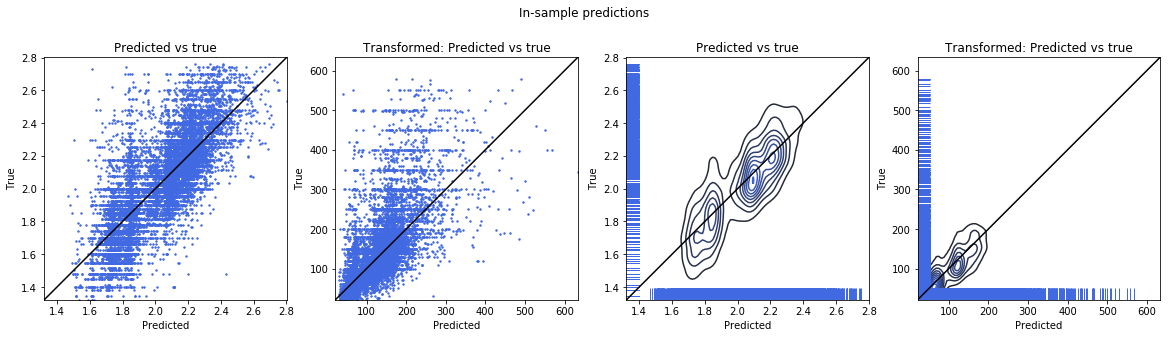

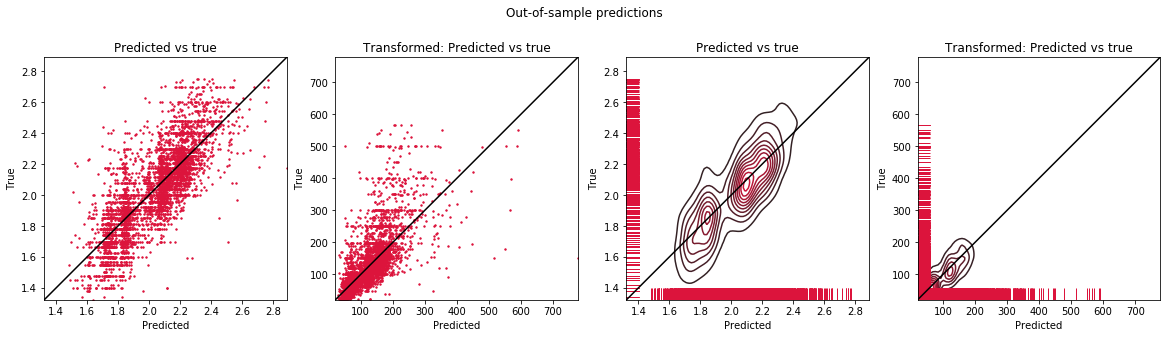

In [320]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
ridge_suburb = print_results('Ridge_suburbs.p', test_tpl, train_tpl, 'both', True)

In [321]:
best_params = ridge_suburb['fitted_model'].best_params_
best_params

{'ridge__alpha': 1.0}

In [322]:
X_train, y_train = prepare_datasets(X_train_suburb, y_train_suburb)
regr = linear_model.Ridge(alpha=best_params['ridge__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('ridge', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_suburb.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_suburb_same_room_type,-0.001947
Air_calculated_host_listings_count,-0.002088
Air_bathrooms,0.021927
Air_beds,-0.005435
Air_bedrooms,0.062691
Air_accommodates,0.037819
Air_extra_people,0.008120
Air_guests_included,0.007628
Air_distance_to_CBD,-0.040885
Air_property_type_2_House_Cottage_Villa,0.004286


*Constructed aggregation - 500m*

Lasso

Untransformed
-------------
R2 train: 0.63 / RMSE train 0.16 / MAE train 0.12 / Nobs: 13230
R2 test: 0.64 / RMSE test 0.16 / MAE test 0.12 / Nobs: 3739

Transformed
-----------
R2 train: 0.50 / RMSE train 60.78 / MAE train 36.83 / Nobs: 13230
R2 test: 0.51 / RMSE test 60.20 / MAE test 36.05 / Nobs: 3739



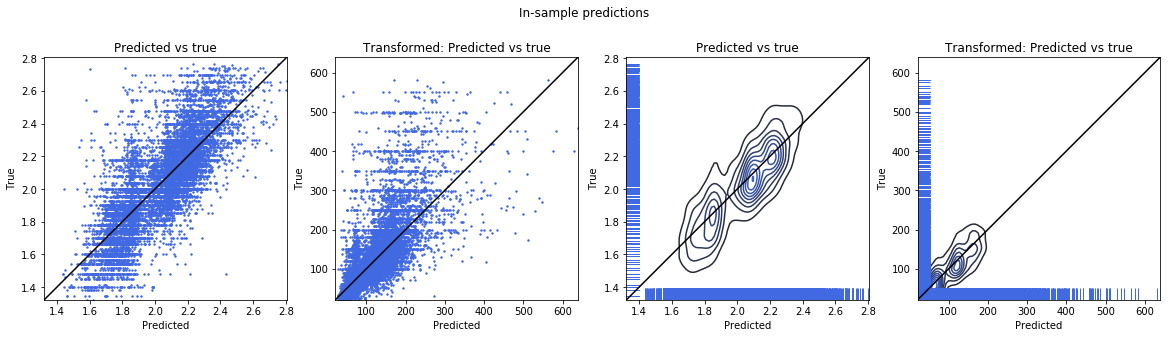

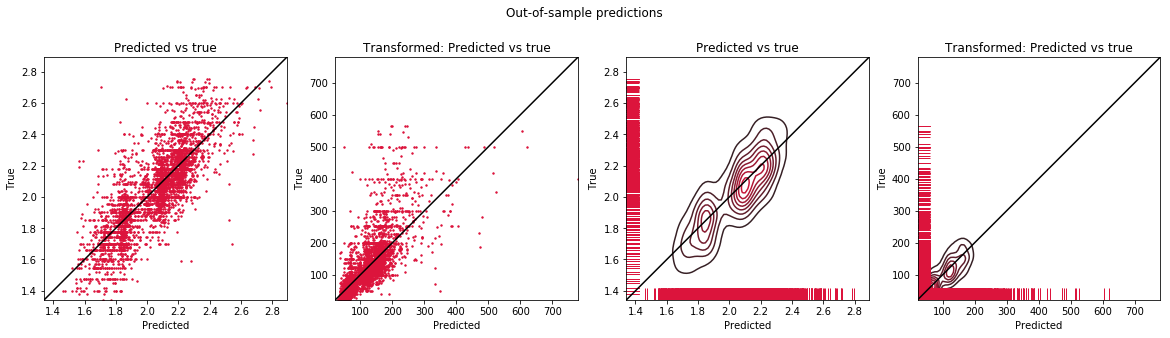

In [323]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
lasso_500m = print_results('Lasso_500m.p', test_tpl, train_tpl, 'both', True)

In [324]:
best_params = lasso_500m['fitted_model'].best_params_
best_params

{'lasso__alpha': 1e-10}

In [325]:
X_train, y_train = prepare_datasets(X_train_500m, y_train_500m)
regr = linear_model.Lasso(alpha=best_params['lasso__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('lasso', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_500m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_500m_same_room_type,0.072017
Air_calculated_host_listings_count,-0.002372
Air_bathrooms,0.020674
Air_beds,-0.002800
Air_bedrooms,0.059884
Air_accommodates,0.031469
Air_extra_people,0.006575
Air_guests_included,0.007827
Air_distance_to_CBD,-0.041492
Air_property_type_2_House_Cottage_Villa,0.008088


Ridge

Untransformed
-------------
R2 train: 0.63 / RMSE train 0.16 / MAE train 0.12 / Nobs: 13230
R2 test: 0.64 / RMSE test 0.16 / MAE test 0.12 / Nobs: 3739

Transformed
-----------
R2 train: 0.50 / RMSE train 60.78 / MAE train 36.83 / Nobs: 13230
R2 test: 0.51 / RMSE test 60.20 / MAE test 36.05 / Nobs: 3739



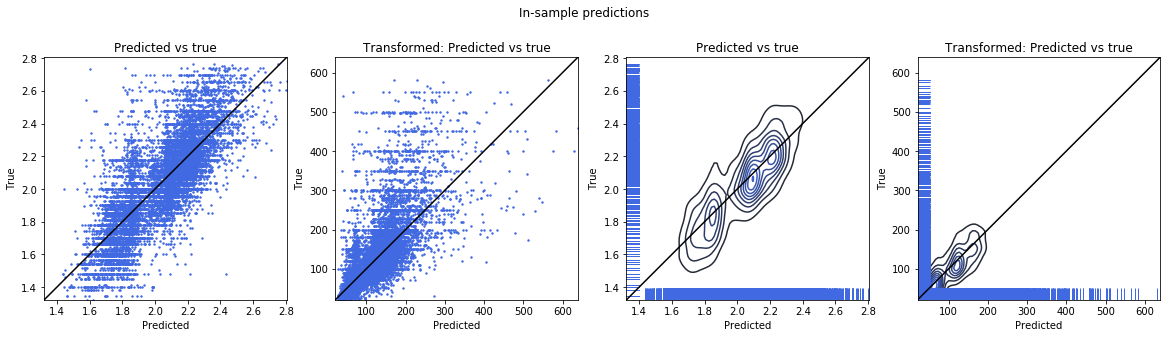

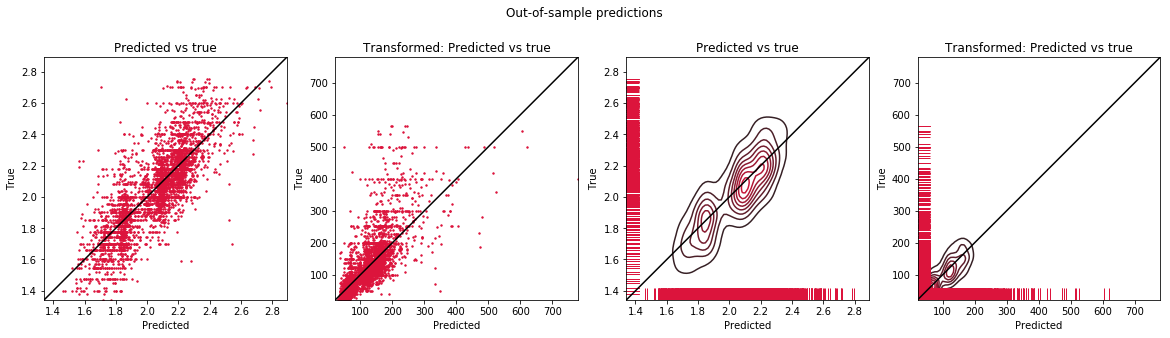

In [326]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
ridge_500m = print_results('Ridge_500m.p', test_tpl, train_tpl, 'both', True)

In [327]:
best_params = ridge_500m['fitted_model'].best_params_
best_params

{'ridge__alpha': 1e-10}

In [328]:
X_train, y_train = prepare_datasets(X_train_500m, y_train_500m)
regr = linear_model.Ridge(alpha=best_params['ridge__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('ridge', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_500m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_500m_same_room_type,0.072017
Air_calculated_host_listings_count,-0.002372
Air_bathrooms,0.020674
Air_beds,-0.002800
Air_bedrooms,0.059884
Air_accommodates,0.031469
Air_extra_people,0.006575
Air_guests_included,0.007827
Air_distance_to_CBD,-0.041492
Air_property_type_2_House_Cottage_Villa,0.008088


*Constructed aggregation - 100m*

Lasso

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.15 / MAE train 0.11 / Nobs: 9203
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.11 / Nobs: 2177

Transformed
-----------
R2 train: 0.49 / RMSE train 59.28 / MAE train 36.07 / Nobs: 9203
R2 test: 0.52 / RMSE test 53.54 / MAE test 34.09 / Nobs: 2177



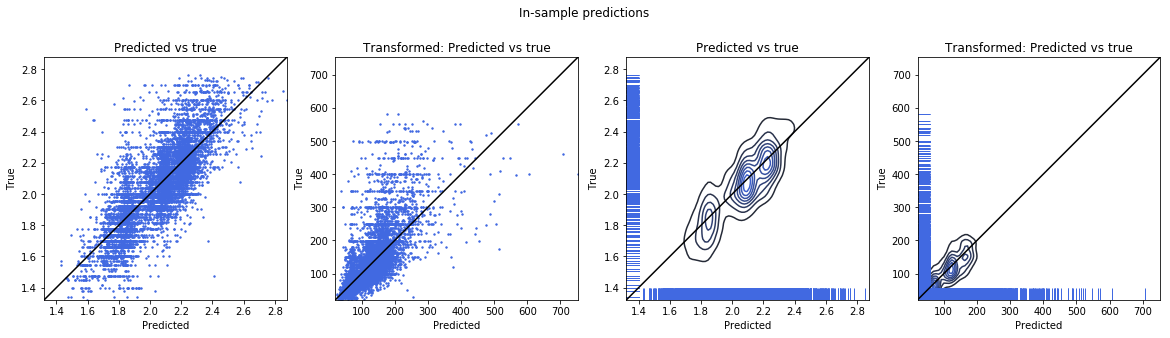

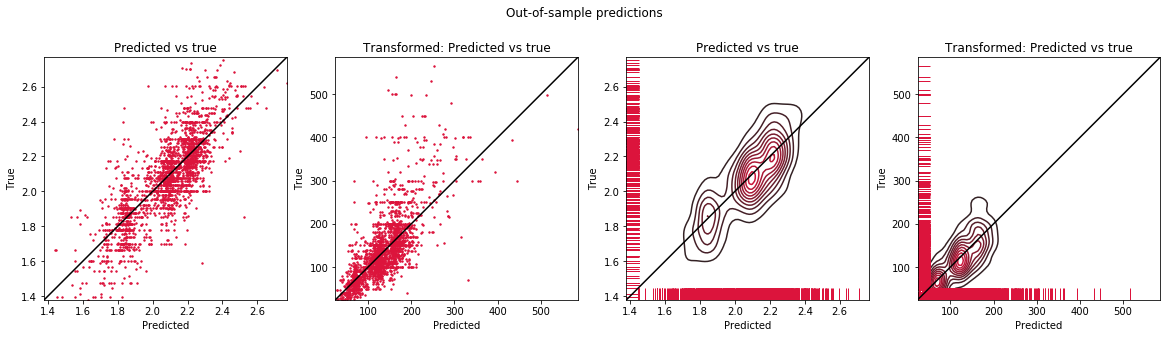

In [329]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
lasso_100m = print_results('Lasso_100m.p', test_tpl, train_tpl, 'both', True)

In [330]:
best_params = lasso_100m['fitted_model'].best_params_
best_params

{'lasso__alpha': 1e-10}

In [331]:
X_train, y_train = prepare_datasets(X_train_100m, y_train_100m)
regr = linear_model.Lasso(alpha=best_params['lasso__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('lasso', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_100m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_100m_same_room_type,0.050536
Air_calculated_host_listings_count,-0.003934
Air_bathrooms,0.020505
Air_beds,0.004655
Air_bedrooms,0.062902
Air_accommodates,0.018612
Air_extra_people,0.007173
Air_guests_included,0.005975
Air_distance_to_CBD,-0.047910
Air_property_type_2_House_Cottage_Villa,0.002827


Ridge

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.15 / MAE train 0.11 / Nobs: 9203
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.11 / Nobs: 2177

Transformed
-----------
R2 train: 0.49 / RMSE train 59.28 / MAE train 36.07 / Nobs: 9203
R2 test: 0.52 / RMSE test 53.54 / MAE test 34.09 / Nobs: 2177



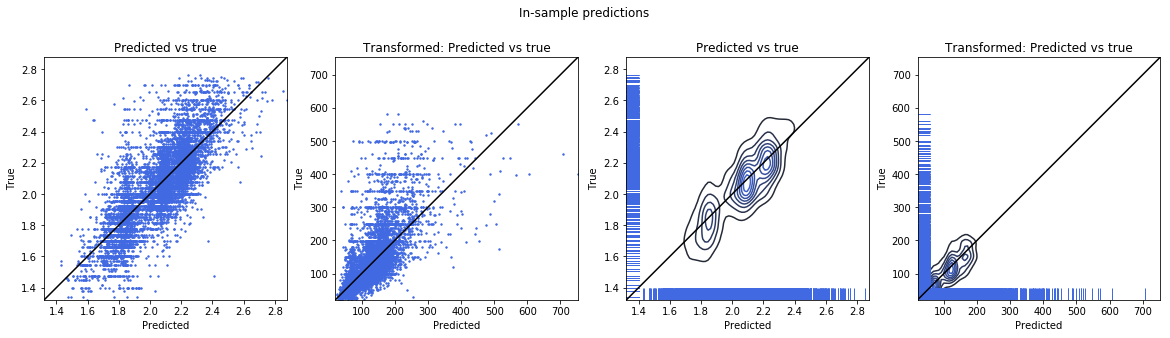

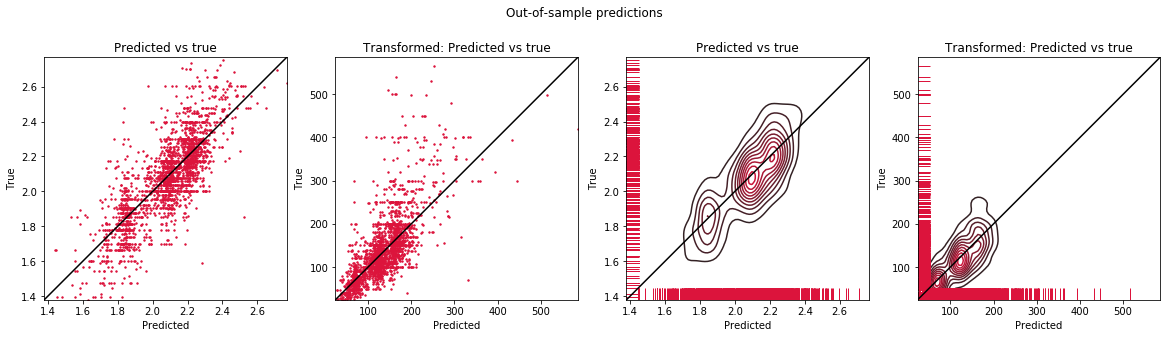

In [332]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
ridge_100m = print_results('Ridge_100m.p', test_tpl, train_tpl, 'both', True)

In [333]:
best_params = ridge_100m['fitted_model'].best_params_
best_params

{'ridge__alpha': 1e-10}

In [334]:
X_train, y_train = prepare_datasets(X_train_100m, y_train_100m)
regr = linear_model.Ridge(alpha=best_params['ridge__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('ridge', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_100m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_100m_same_room_type,0.050536
Air_calculated_host_listings_count,-0.003934
Air_bathrooms,0.020505
Air_beds,0.004655
Air_bedrooms,0.062902
Air_accommodates,0.018612
Air_extra_people,0.007173
Air_guests_included,0.005975
Air_distance_to_CBD,-0.047909
Air_property_type_2_House_Cottage_Villa,0.002827


*Constructed aggregation - 50m*

Lasso

Untransformed
-------------
R2 train: 0.59 / RMSE train 0.15 / MAE train 0.11 / Nobs: 6522
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.10 / Nobs: 1340

Transformed
-----------
R2 train: 0.47 / RMSE train 58.91 / MAE train 35.91 / Nobs: 6522
R2 test: 0.51 / RMSE test 51.07 / MAE test 32.92 / Nobs: 1340



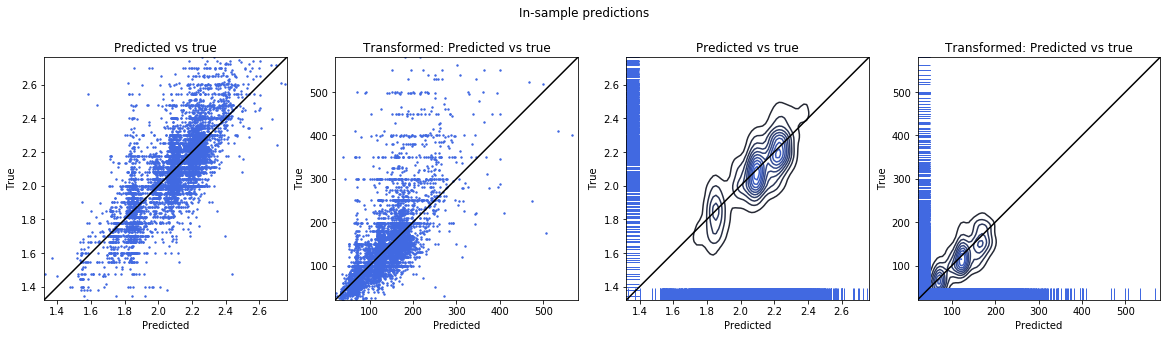

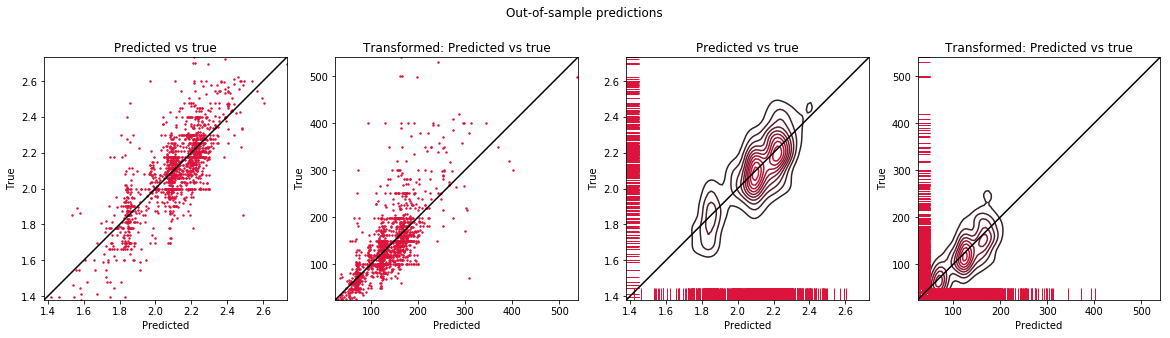

In [335]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
lasso_50m = print_results('Lasso_50m.p', test_tpl, train_tpl, 'both', True)

In [336]:
best_params = lasso_50m['fitted_model'].best_params_
best_params

{'lasso__alpha': 0.0001}

In [337]:
X_train, y_train = prepare_datasets(X_train_50m, y_train_50m)
regr = linear_model.Lasso(alpha=best_params['lasso__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('lasso', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_50m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_50m_same_room_type,0.026636
Air_calculated_host_listings_count,-0.005140
Air_bathrooms,0.021342
Air_beds,0.007403
Air_bedrooms,0.064463
Air_accommodates,0.011711
Air_extra_people,0.007733
Air_guests_included,0.007199
Air_distance_to_CBD,-0.045437
Air_property_type_2_House_Cottage_Villa,0.001931


Ridge

Untransformed
-------------
R2 train: 0.59 / RMSE train 0.15 / MAE train 0.11 / Nobs: 6522
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.10 / Nobs: 1340

Transformed
-----------
R2 train: 0.47 / RMSE train 58.91 / MAE train 35.93 / Nobs: 6522
R2 test: 0.51 / RMSE test 50.99 / MAE test 32.87 / Nobs: 1340



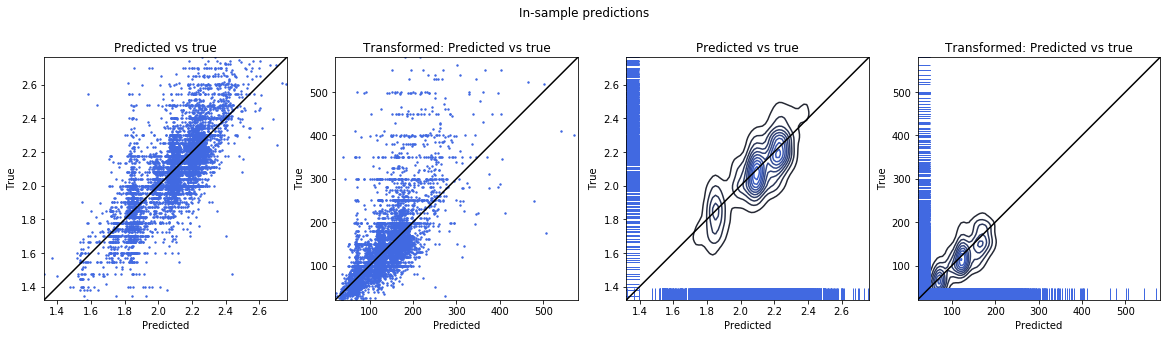

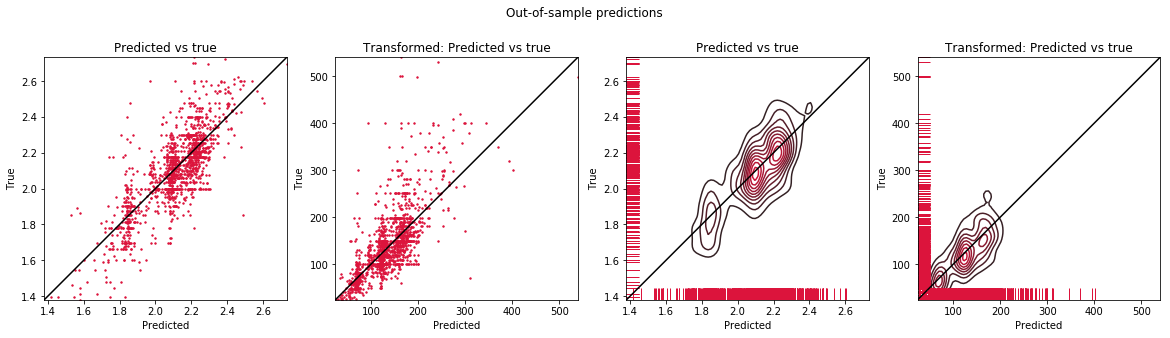

In [338]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
ridge_50m = print_results('Ridge_50m.p', test_tpl, train_tpl, 'both', True)

In [339]:
best_params =ridge_50m['fitted_model'].best_params_ 
best_params

{'ridge__alpha': 1e-10}

In [340]:
X_train, y_train = prepare_datasets(X_train_50m, y_train_50m)
regr = linear_model.Ridge(alpha=best_params['ridge__alpha'])
model = Pipeline([('scaler', StandardScaler()), ('ridge', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_50m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_50m_same_room_type,0.026285
Air_calculated_host_listings_count,-0.005202
Air_bathrooms,0.021357
Air_beds,0.007545
Air_bedrooms,0.064507
Air_accommodates,0.011460
Air_extra_people,0.007802
Air_guests_included,0.007316
Air_distance_to_CBD,-0.047772
Air_property_type_2_House_Cottage_Villa,0.002274
